In [1]:
import os
# Find the latest version of spark 3.x  from http://www.apache.org/dist/spark/ and enter as the spark version
# For example:
# spark_version = 'spark-3.4.0'
spark_version = 'spark-3.4.0'
os.environ['SPARK_VERSION']=spark_version

# Install Spark and Java
!apt-get update
!apt-get install openjdk-11-jdk-headless -qq > /dev/null
!wget -q http://www.apache.org/dist/spark/$SPARK_VERSION/$SPARK_VERSION-bin-hadoop3.tgz
!tar xf $SPARK_VERSION-bin-hadoop3.tgz
!pip install -q findspark

# Set Environment Variables
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-11-openjdk-amd64"
os.environ["SPARK_HOME"] = f"/content/{spark_version}-bin-hadoop3"

# Start a SparkSession
import findspark
findspark.init()

Hit:1 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:2 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [119 kB]
Get:3 http://security.ubuntu.com/ubuntu jammy-security InRelease [110 kB]
Get:4 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,626 B]
Hit:5 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease
Get:6 http://archive.ubuntu.com/ubuntu jammy-backports InRelease [109 kB]
Hit:7 https://ppa.launchpadcontent.net/c2d4u.team/c2d4u4.0+/ubuntu jammy InRelease
Get:8 http://security.ubuntu.com/ubuntu jammy-security/universe amd64 Packages [986 kB]
Get:9 http://security.ubuntu.com/ubuntu jammy-security/main amd64 Packages [862 kB]
Get:10 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease [18.1 kB]
Get:11 http://archive.ubuntu.com/ubuntu jammy-updates/main amd64 Packages [1,173 kB]
Get:12 http://archive.ubuntu.com/ubuntu jammy-updates/universe amd64 Packages [1,251 kB]
Get:13 http://archive.ubuntu.co

In [2]:
# Import packages
from pyspark.sql import SparkSession
import time

# Create a SparkSession
spark = SparkSession.builder.appName("SparkSQL").getOrCreate()

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
# Import necessary libraries
from pyspark.sql import SparkSession

# Create a SparkSession
spark = SparkSession.builder.appName("LocalCSVToDataFrame").getOrCreate()

# Define the path to your local CSV file
drive_csv_path = "drive/MyDrive/Data/Combined_Flights_2022.csv"

# Read the local CSV file into a DataFrame
df = spark.read.csv(drive_csv_path, sep=",", header=True)

# Show the DataFrame
df.show()


+----------+--------------------+------+----+---------+--------+----------+-------+---------------+--------+-------+---------------+-------+--------------+-----------------+--------+----+-------+-----+----------+---------+-------------------------+---------------------------------------+------------------------+---------------------------+-------------------------------+-----------------+------------------------+---------------------------+-----------+-------------------------------+---------------+------------------+------------------+--------------------+-----------+---------------+---------------+---------+-------------+----------------+----------------+-------------------+---------+-------------+-------------+-------+--------+--------------------+----------+-------+---------+--------+------+----------+--------+--------+------------------+----------+-------------+------------------+
|FlightDate|             Airline|Origin|Dest|Cancelled|Diverted|CRSDepTime|DepTime|DepDelayMinutes|De

In [5]:
# Create a temporary view of the DataFrame.
df.createOrReplaceTempView('flights')

In [6]:
 # Get total number of records in dataset
print("The data contain %d records." % df.count())

# View the first five records of dataframe
df.show(5)

The data contain 4078318 records.
+----------+--------------------+------+----+---------+--------+----------+-------+---------------+--------+-------+---------------+-------+--------------+-----------------+--------+----+-------+-----+----------+---------+-------------------------+---------------------------------------+------------------------+---------------------------+-------------------------------+-----------------+------------------------+---------------------------+-----------+-------------------------------+---------------+------------------+------------------+--------------------+-----------+---------------+---------------+---------+-------------+----------------+----------------+-------------------+---------+-------------+-------------+-------+--------+--------------------+----------+-------+---------+--------+------+----------+--------+--------+------------------+----------+-------------+------------------+
|FlightDate|             Airline|Origin|Dest|Cancelled|Diverted|CRS

+--------------------+-------------------+
|             airline|TotalDepartureDelay|
+--------------------+-------------------+
|Air Wisconsin Air...|               5726|
|Hawaiian Airlines...|               6730|
|Capital Cargo Int...|               6831|
|GoJet Airlines, L...|               7451|
|Commutair Aka Cha...|               7632|
|         Horizon Air|               8236|
|  Mesa Airlines Inc.|              13496|
|   Endeavor Air Inc.|              20119|
|Alaska Airlines Inc.|              21599|
|           Envoy Air|              22471|
|       Allegiant Air|              22520|
|         Comair Inc.|              26377|
|Frontier Airlines...|              26450|
|    Spirit Air Lines|              31905|
|   Republic Airlines|              35001|
|     JetBlue Airways|              51542|
|SkyWest Airlines ...|              69816|
|United Air Lines ...|              74412|
|Delta Air Lines Inc.|              91349|
|American Airlines...|             104963|
|Southwest 

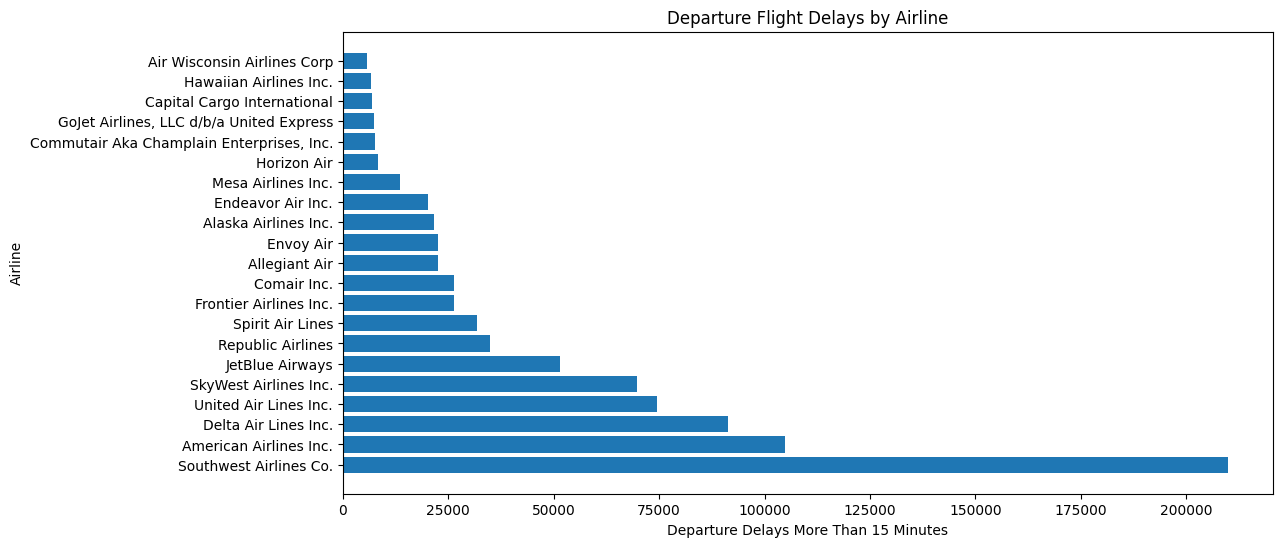

In [7]:

# Query to find the total number of flights in different Airlines that had Departure delays by 15 minutes or more

a = """
SELECT airline, count(*) TotalDepartureDelay
FROM flights
WHERE depdel15 = 1
GROUP BY airline
ORDER BY TotalDepartureDelay
"""
result_df = spark.sql(a).show(n=25)



import matplotlib.pyplot as plt
import pandas as pd
result_df = spark.sql(a)

# Convert the Spark DataFrame to a Pandas DataFrame
pandas_df = result_df.toPandas()

# Now you can plot the data using Matplotlib
plt.figure(figsize=(12, 6))
plt.barh(pandas_df['airline'], pandas_df['TotalDepartureDelay'])
plt.xlabel('Departure Delays More Than 15 Minutes')
plt.ylabel('Airline')
plt.title('Departure Flight Delays by Airline')
plt.gca().invert_yaxis()
plt.show()


+--------------------+-----------------+
|             airline|TotalArrivalDelay|
+--------------------+-----------------+
|Air Wisconsin Air...|             6182|
|Hawaiian Airlines...|             7245|
|Capital Cargo Int...|             8000|
|Commutair Aka Cha...|             8435|
|GoJet Airlines, L...|             8566|
|         Horizon Air|             9168|
|  Mesa Airlines Inc.|            13308|
|   Endeavor Air Inc.|            22524|
|Alaska Airlines Inc.|            24543|
|           Envoy Air|            24599|
|       Allegiant Air|            25237|
|Frontier Airlines...|            27011|
|         Comair Inc.|            28702|
|    Spirit Air Lines|            33369|
|   Republic Airlines|            40590|
|     JetBlue Airways|            49968|
|United Air Lines ...|            70843|
|SkyWest Airlines ...|            73739|
|Delta Air Lines Inc.|            86875|
|American Airlines...|           107894|
|Southwest Airline...|           177164|
+---------------

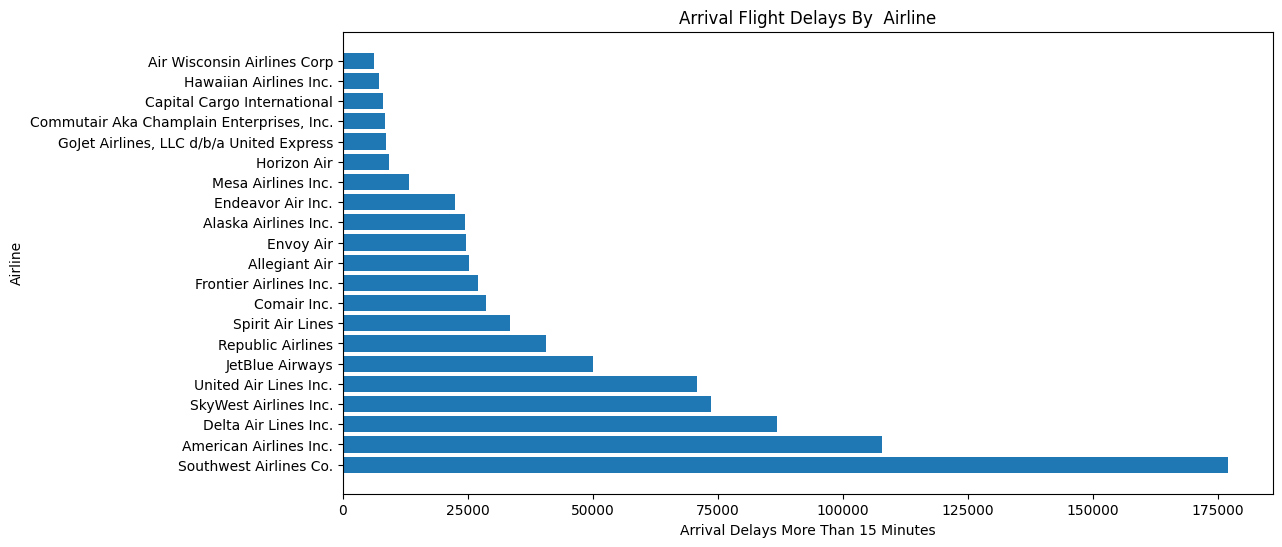

In [8]:
#  Query to find the total number of flights in different Airlines that had Arrival delays by 15 minutes or more

b =  """
SELECT airline, count(*) TotalArrivalDelay
FROM flights
WHERE ArrDel15 = 1
group by airline
order by TotalArrivalDelay
"""
result_df1 = spark.sql(b).show(n=25)




import matplotlib.pyplot as plt
import pandas as pd
result_df1 = spark.sql(b)

# Convert the Spark DataFrame to a Pandas DataFrame
pandas_df = result_df1.toPandas()

# Plot the data using Matplotlib
plt.figure(figsize=(12, 6))
plt.barh(pandas_df['airline'], pandas_df['TotalArrivalDelay'])
plt.xlabel('Arrival Delays More Than 15 Minutes')
plt.ylabel('Airline')
plt.title('Arrival Flight Delays By  Airline')
plt.gca().invert_yaxis()
plt.show()


+--------------------+----------------+
|             airline|CancelledFlights|
+--------------------+----------------+
|Hawaiian Airlines...|             351|
|         Horizon Air|             980|
|Air Wisconsin Air...|            1426|
|Capital Cargo Int...|            1481|
|Commutair Aka Cha...|            1518|
|GoJet Airlines, L...|            2422|
|Frontier Airlines...|            2501|
|       Allegiant Air|            2891|
|  Mesa Airlines Inc.|            2956|
|Alaska Airlines Inc.|            3738|
|           Envoy Air|            3891|
|    Spirit Air Lines|            4198|
|         Comair Inc.|            5351|
|   Endeavor Air Inc.|            5819|
|     JetBlue Airways|            7631|
|United Air Lines ...|            8074|
|SkyWest Airlines ...|            9287|
|Delta Air Lines Inc.|           10341|
|   Republic Airlines|           11436|
|Southwest Airline...|           18164|
|American Airlines...|           18736|
+--------------------+----------------+


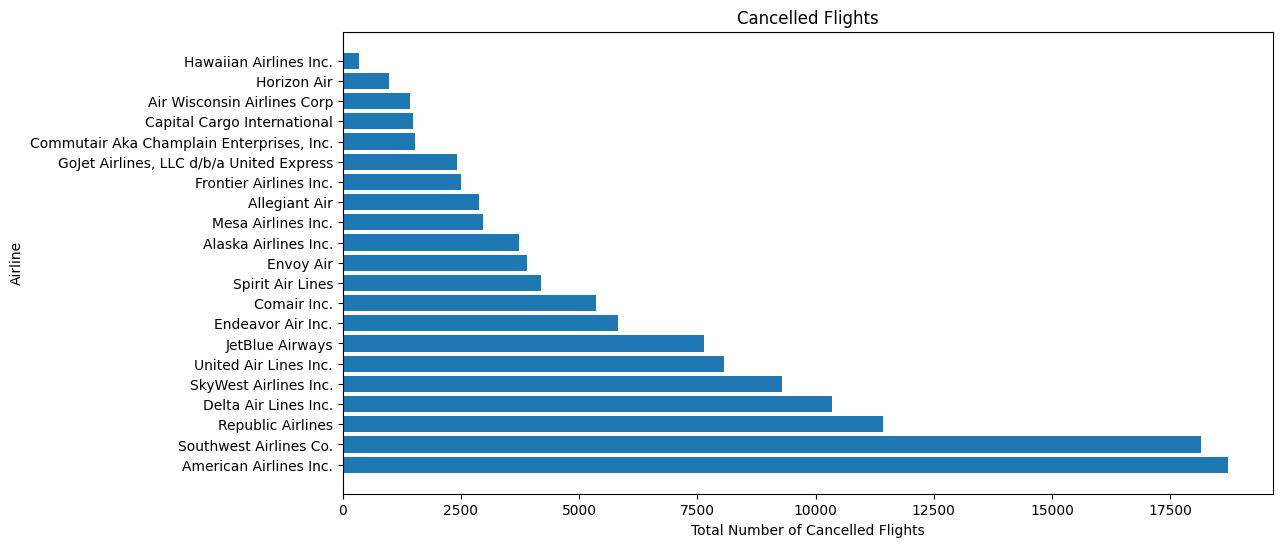

In [9]:
# Query to find the total No of Flights Cancelled

c = """
SELECT  airline, count(*) CancelledFlights
FROM flights
WHERE Cancelled = True
GROUP BY airline
ORDER BY CancelledFlights
"""
result_df2 = spark.sql(c).show(n=25)


import matplotlib.pyplot as plt
import pandas as pd
result_df2 = spark.sql(c)

# Convert the Spark DataFrame to a Pandas DataFrame
pandas_df = result_df2.toPandas()

# plot the data using Matplotlib
plt.figure(figsize=(12, 6))
plt.barh(pandas_df['airline'], pandas_df['CancelledFlights'])
plt.xlabel('Total Number of Cancelled Flights')
plt.ylabel('Airline')
plt.title('Cancelled Flights')
plt.gca().invert_yaxis()
plt.show()


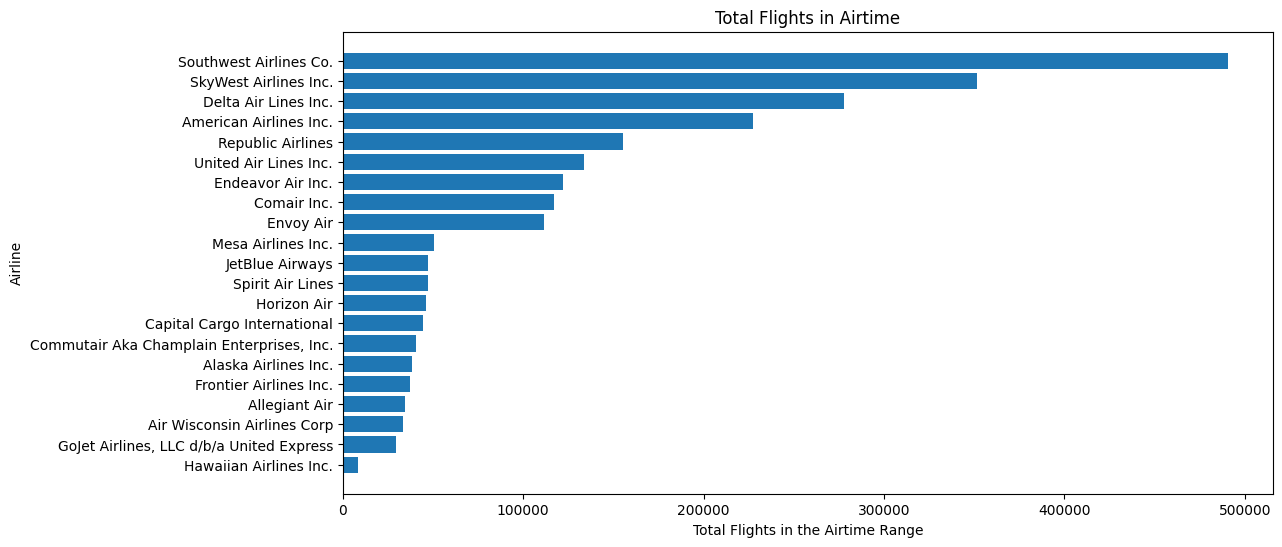

In [10]:
## Query Finding which Airlines has more AirTime Greater than 30 minutes or less than 120 minutes

d = """
SELECT airline, count(*) as AirTime
FROM flights
WHERE airtime >= 30 AND airtime <= 120
GROUP BY airline
ORDER BY AirTime
"""
result_df3 = spark.sql(d)

# Convert the Spark DataFrame to a Pandas DataFrame
pandas_df = result_df3.toPandas()

# Plotting the data using Matplotlib
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.barh(pandas_df['airline'], pandas_df['AirTime'])
plt.xlabel('Total Flights in the Airtime Range')
plt.ylabel('Airline')
plt.title('Total Flights in Airtime')
plt.show()



In [14]:
#  Cache the the temporary table Flights.
spark.sql('CACHE TABLE flights')

DataFrame[]

In [15]:
# 8. Check if the table is cached.
spark.catalog.isCached('flights')

True

In [16]:
# 14. Uncache the flights temporary table.
spark.sql('uncache table flights')


DataFrame[]

In [17]:
# 15. Check if the home_saflightsles is no longer cached
if spark.catalog.isCached('flights'):
  print('flights is cached')
else:
  print('not cached')

not cached
